In [0]:
!pip3 install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
import numpy as np


def collect_data_via_gd(link: str, filenm: str) -> np.array:
    auth.authenticate_user()
    gauth = GoogleAuth()
    gauth.credentials = GoogleCredentials.get_application_default()
    drive = GoogleDrive(gauth)
    fluff, id = link.split('=')
    downloader = drive.CreateFile({'id':id})
    downloader.GetContentFile(filenm)  
    return np.load(filenm)

In [0]:
import matplotlib.pyplot as plt
from scipy.special import factorial
from scipy import stats
import warnings

warnings.simplefilter('ignore')

%matplotlib inline

# Задача №1

$X_1, \ldots, X_n$ --- выборка из распределения $\mathcal{N}(a_1 , \sigma^2)$,  $Y_1, \ldots, Y_m$ --- выборка из распределения $\mathcal{N}(a_2, \sigma^2)$, а $Z_1, \ldots, Z_k$ --- выборка из распределения $\mathcal{N}(a_3, \sigma^2)$. Постройте $F$-критерий размера $\alpha$ для проверки гипотезы $H_0: a_1 = a_2$ и $a_1 + a_2 = a_3$ при неизвестном $\sigma^2$.

Протестируйте построенный вами критерий. Рассмотрите $\sigma^2 = 1$. 

Рассмотрите три установки с различными значениями $a_i$ на ваш вкус:

*   когда гипотеза выполняется,

*   когда гипотеза "почти" выполняется,

*   когда гипотеза не выполняется.

a) Зафиксируйте значения $n = 100$, $m = 150$, $k = 300$. Для каждого эксперимента численно определите минимальный размер критерия, при котором гипотеза $H_0$ отвергается. Визуализируйте соответствующие квантили на графике распределения Фишера. В этом задании вам может помочь обратная функция распределения, реализованная в $\verb|scipy.stats|$.

б) Положите $n = m = k = N$, где $N$ изменяется в промежутке от $1$ до $1000$. Для каждого из трёх экспериментов постройте график $\alpha(N)$, где $\alpha(N)$ --- минимальный размер критерия, при котором гипотеза $H_0$ отвергается. В этой задаче можно использовать цикл по $N$.

Матрицы для проверки критерия можно посчитать численно. Не забудьте описать алгоритмы вычислений и сделать выводы.


# Решение

# Вывод №1

# Задача №2

Пусть $X_1, \ldots, X_n$ --- выборка из распределения
$\mathcal{N}(\theta,1)$. Построить (то есть, в том числе построить её график) функцию мощности критерия Стьюдента
проверки гипотезы $H_0: \theta=0$ уровня значимости $0.05$ для
$\theta\in[-10, 10]$, при нескольких различных значениях $n$. Как объяснить её изменения при растущих $n$?

Найти такое минимальное $n$, что при $|\theta_0-\theta_1|=1$ при
проверке гипотезы $H_0: \theta = \theta_0$ против альтернативы $H_1:
\theta=\theta_1$ критерием Стьюдента уровня значимости $0.05$
вероятность ошибки второго рода станет меньше вероятности ошибки
первого рода.

В этой задаче можно использовать циклы, но предпочтительной является конструкция} $\textbf{[... for ... in ...]}$ или аналогичная ей.

# Решение

*t-критерий Стьюдента*:

---

Применяется для проверки основной гипотезы $$H_{0} : E(X) = \theta.$$ 
Используя несмещенную оценку дисперсии $s(X)$ получаем *t-критерий*: $$t_{n} = \frac{\bar{X} - E_{\theta} X}{s(X)}\sqrt{n},$$
при принятии основной гипотезы: $$E(\bar{X}) = \theta.$$

---

Функцию мощности *t-критерия* проверки гипотезы  
$$H_{0}: \theta = 0 \space vs \space H_{1}: \theta = \theta_{1},$$
где:  
$$\theta_1 \in [-10;0) \cup (0;10]$$  
$$t_{n} = \frac{\bar{X} - E_\theta(X)}{s(X)}\sqrt{n}.$$     

Пусть $\theta_{0} = 0$, $z_{\alpha}$: $\alpha-$квантиль распределения Стьюдента.   
Рассмотрим два случая, т.к. у нас двусторонняя альтернатива:   

1) $\theta_{1} > 0$:
$$P_{\theta_{0}}(t_{\theta_{0}} > z_{1-\alpha}) = \alpha,$$
$$S = \{t_{\theta_{0}} > z_{1-\alpha} \},$$
где:
$$\beta(\theta_{1}, S) = P_{\theta_{1}}(t_{\theta_{0}} > z_{1-\alpha}) =$$
$$ = P_{\theta_{1}}\left(t_{\theta_{1}} > z_{1-\alpha} -\frac{E_{\theta_{1}}(X) - E_{\theta_{0}}(X)}{s(X)} \sqrt{n}\right) =$$
$$= 1 - P_{\theta_{1}}\left(t_{\theta_{1}} \leq z_{1-\alpha} -\frac{E_{\theta_{1}}(X) - E_{\theta_{0}}(X)}{s(X)} \sqrt{n}\right) =$$
$$= 1 - F_{T_{n}}\left(z_{1-\alpha} -\frac{E_{\theta_1}(X) - E_{\theta_0}(X)}{s(X)} \sqrt{n}\right).$$   

2) $\theta_{1} < 0$:
$$P_{\theta_{0}}(t_{\theta_{0}} \leq z_{\alpha}) = \alpha,$$
$$S = \{t_{\theta_{0}} \leq z_{\alpha} \},$$
где:
$$\beta(\theta_{1}, S) = P_{\theta_{1}}(t_{\theta_{0}} \leq z_{\alpha}) =$$
$$= P_{\theta_{1}}\left(t_{\theta_{1}} \leq z_{\alpha} -\frac{E_{\theta_{1}}(X) - E_{\theta_0}(X)}{s(X)} \sqrt{n}\right) =$$
$$= F_{T_n}\left(z_{\alpha} -\frac{E_{\theta_1}(X) - E_{\theta_0}(X)}{s(X)} \sqrt{n}\right)$$

In [0]:
alpha = 0.05
theta = np.linspace(-10, 10, 1000)
n = [10**2, 10**3, 10**4, 10**5, 10**6]

Несмещенную оценка дисперсии $s(X)$:

In [0]:
def var(sample):
    sample_size = len(sample)
    return np.sqrt(sample_size / (sample_size-1) * np.var(sample))

Напишем функцию, которая по размеру выборки, генерирует саму выборку и для каждого $\theta_{1}$ подсчитывает мощность критерия $\beta(\theta_{1}, S)$:

In [0]:
def vcalc_t_test_criteria_power(sample_size):
    sample = stats.norm.rvs(size=sample_size)
    def scalar_calc(theta_):
        nonlocal sample, sample_size
        if theta_ < 0:
            z = stats.t.ppf(alpha, df=sample_size)
            return stats.t.cdf(
                z - theta_*np.sqrt(sample_size)/var(sample),
                df=sample_size)
        else:
            z = stats.t.ppf(1 - alpha, df=sample_size)
            return 1 - stats.t.cdf(
                z - theta_*np.sqrt(sample_size)/var(sample),
                df=sample_size)
    return np.vectorize(scalar_calc)

Теперь исследуем поведение функции мощности при разных размерах выборки при каждом $\theta_{1}$:

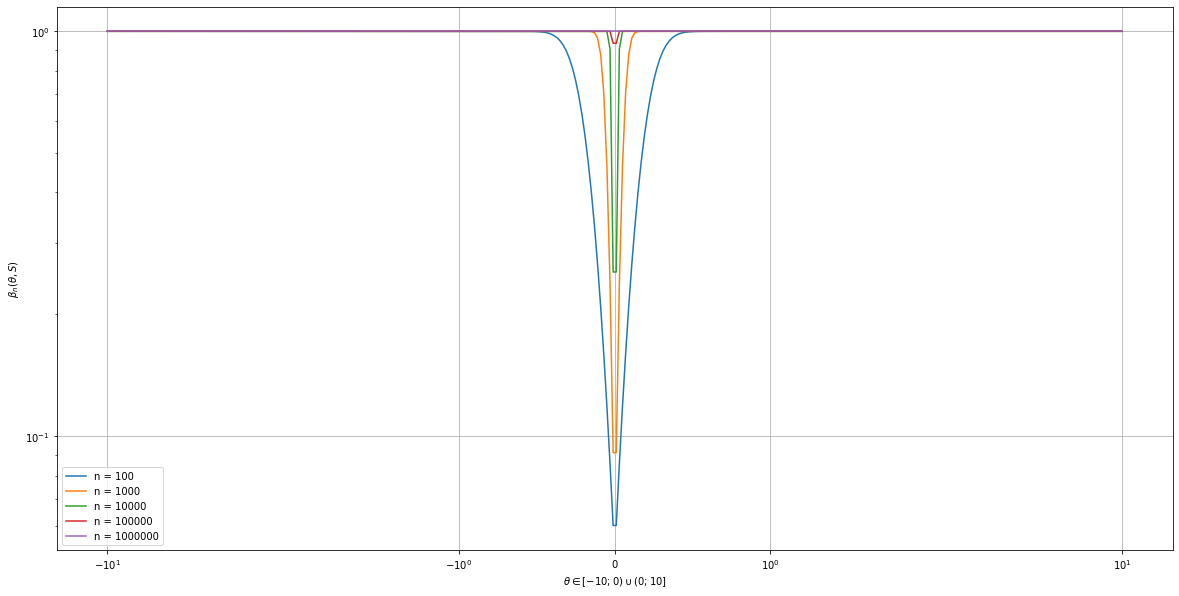

In [8]:
plt.figure(figsize=(20, 10))
plt.xlabel(r'$\theta \in [-10;0) \cup (0;10]$')
plt.ylabel(r'$\beta_{n}(\theta, S)$')
plt.xscale('symlog')
plt.yscale('log')
for sample_size in n:
    plt.plot(
        theta, 
        vcalc_t_test_criteria_power(sample_size)(theta), 
        label=f"n = {sample_size}")
plt.legend()
plt.grid()
plt.show()

Полученный график даёт нам понять, что при $n \geq 10000$ мощность *t-критерия* равна единице, значит, вероятность совершить ошибку 2 рода практически нулевая. Это обьясняется тем, что при увеличении обьема выборки улучшается качество проверки гипотезы.

Теперь  найдем такое минимальное $n$, что при проверке гипотезы:  
$$H_{0}: \theta = 0 \space vs \space H_{1}: \theta = \theta_{1},$$
где:   
$$|\theta_{0} - \theta_{1}| = 1,$$ 
*t-критерием* уровня значимости 0.05 вероятность ошибки 1 рода меньше вероятности ошибки 2 рода.   
Рассмотрим два случая:  

**1.**  
$$H_{0}: \theta = \theta_{0} \space vs \space H_{1}: \theta = \theta_{1} = \theta_{0} + 1$$   
$$\beta(\theta, S) = P_{\theta_1}(t_{\theta_0} > z_{1-\alpha}) =$$
$$= P_{\theta_1}\left(t_{\theta_1} > z_{1-\alpha} -\frac{E_{\theta_1}(X) - E_{\theta_0}(X)}{s(X)} \sqrt{n}\right) =$$
$$= 1 - F_{T_{n}}\left(z_{1-\alpha} -\frac{\sqrt{n}}{s(X)}\right),$$
где $T_{n} -$ распределение Стьюдента.

**2.**  
$$H_{0}: \theta = \theta_{0} \space vs \space H_{1}: \theta = \theta_1 = \theta_0 - 1$$    
$$\beta(\theta, S) = P_{\theta_1}(t_{\theta_0} \leq z_{\alpha}) =$$ 
$$= P_{\theta_1}\left(t_{\theta_1} \leq z_{\alpha} - \frac{E_{\theta_1}(X) - E_{\theta_0}(X)}{s(X)} \sqrt{n}\right) =$$ 
$$= F_{T_{n}}\left(z_{\alpha} + \frac{\sqrt{n}}{s(X)}\right)$$


Определим минимальное $n$ тривиальным перебором для $\theta \in \overline{-10,10}.$ Для большей наглядности построим графики и определим по ним:

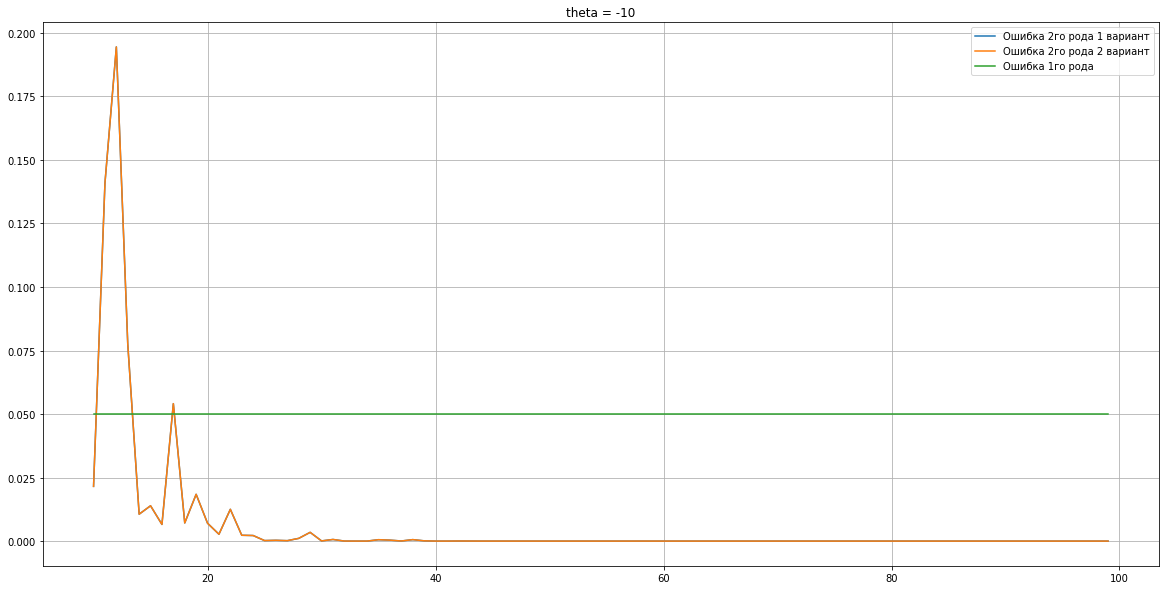

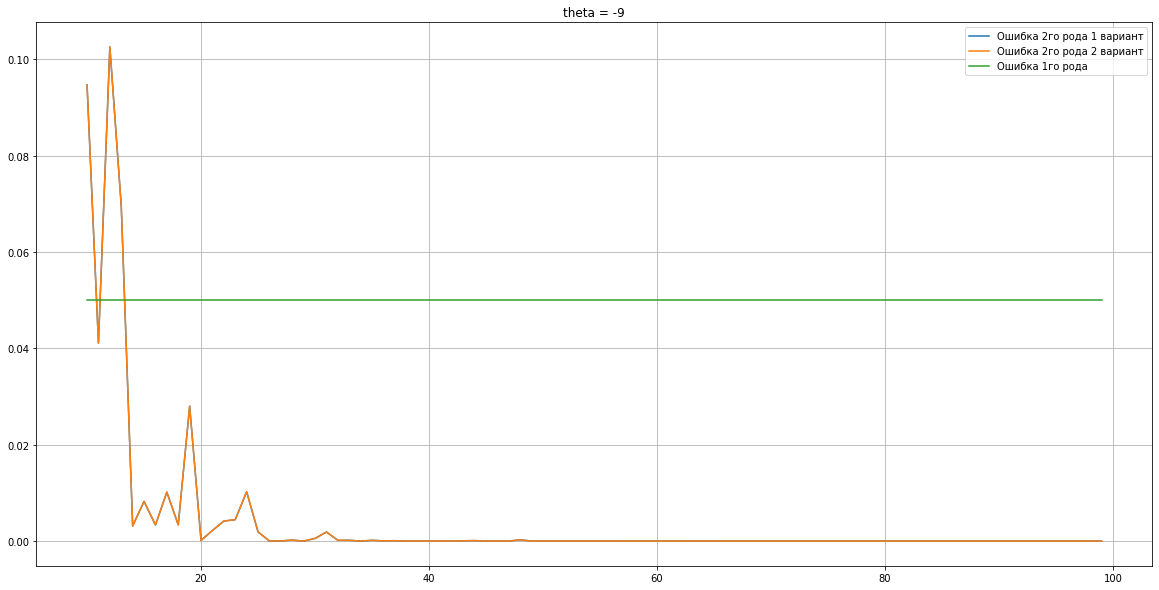

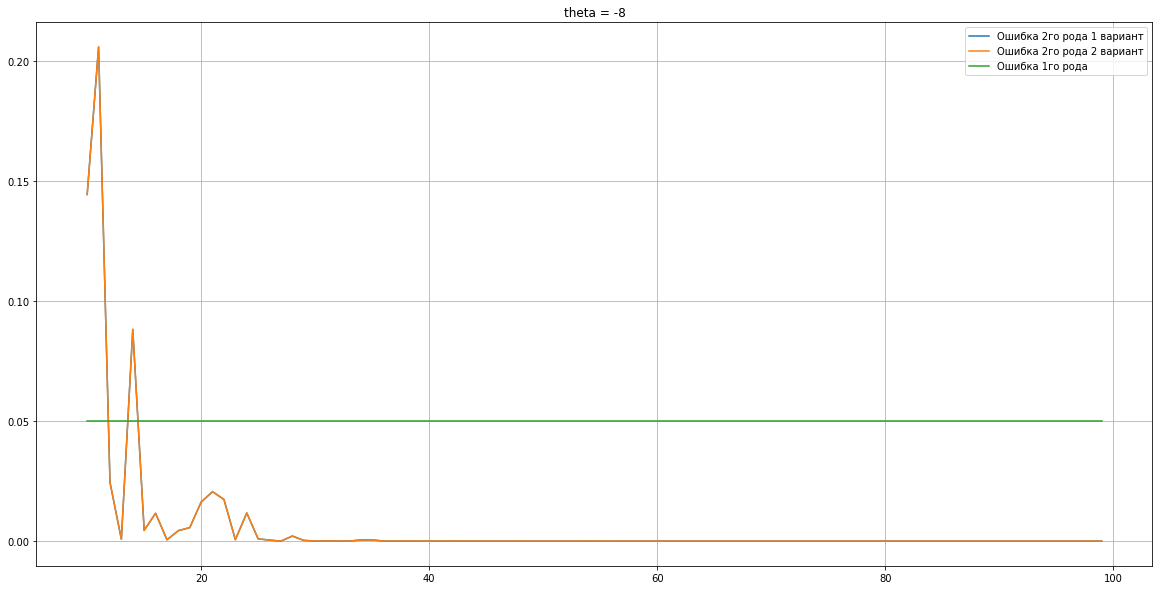

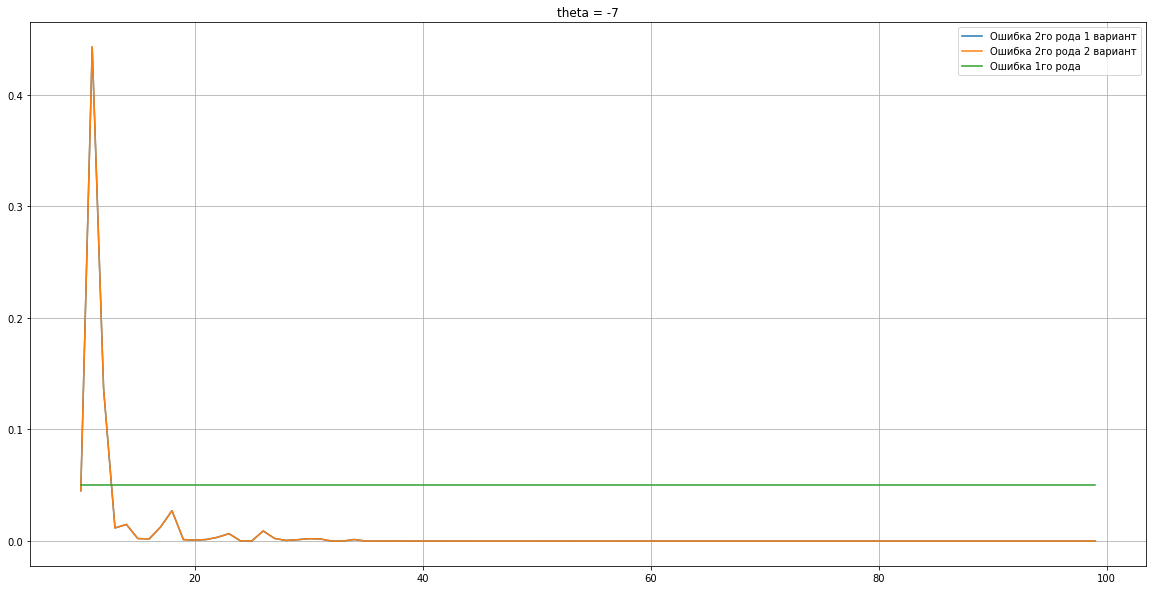

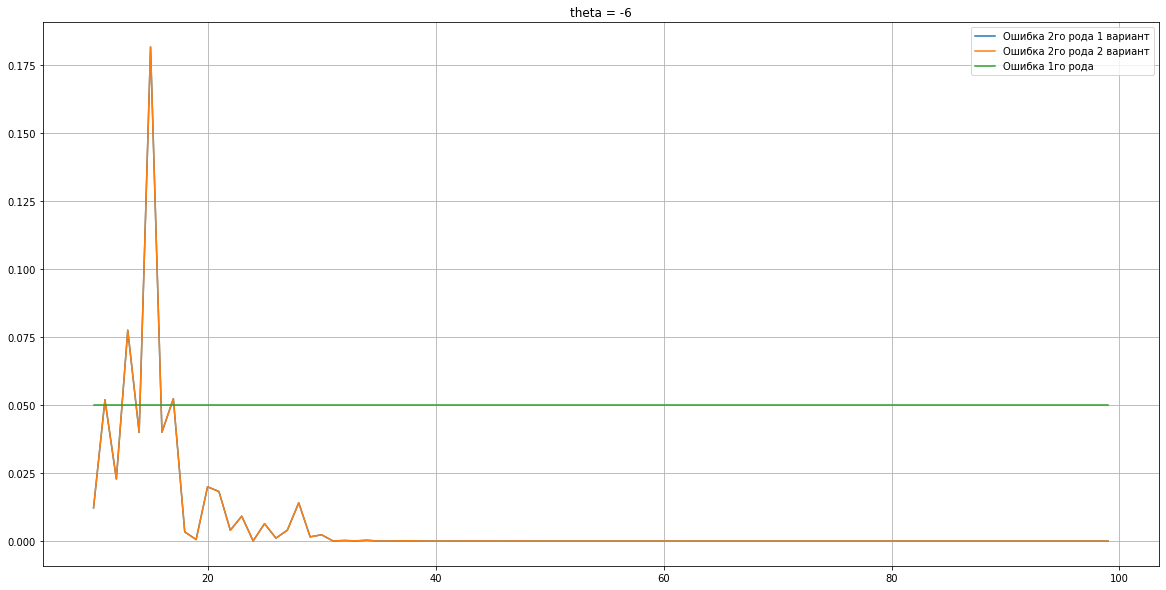

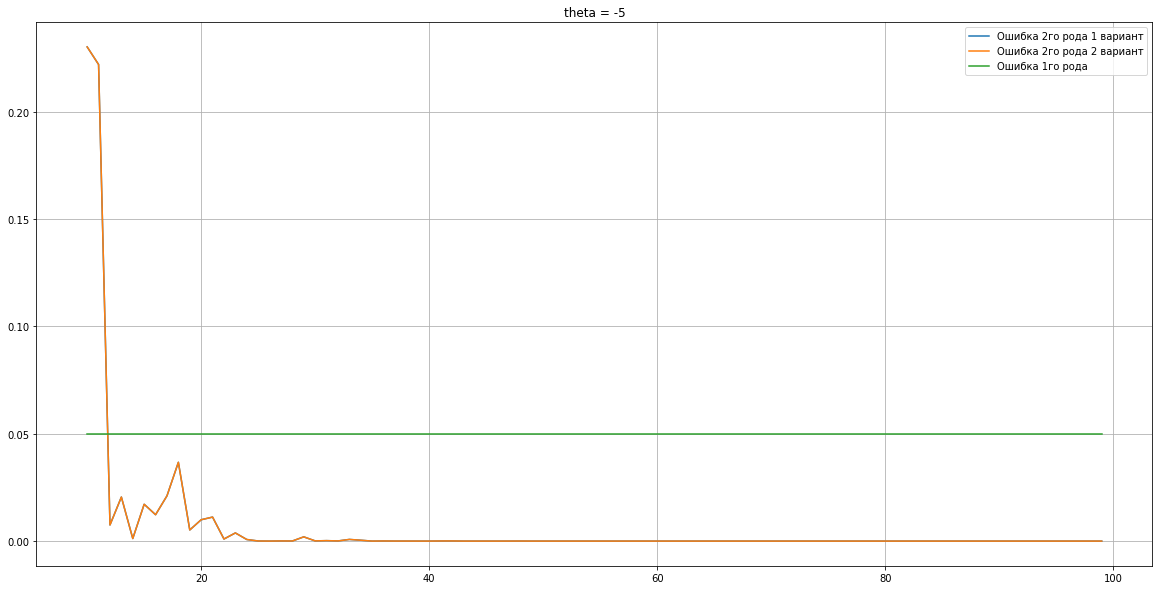

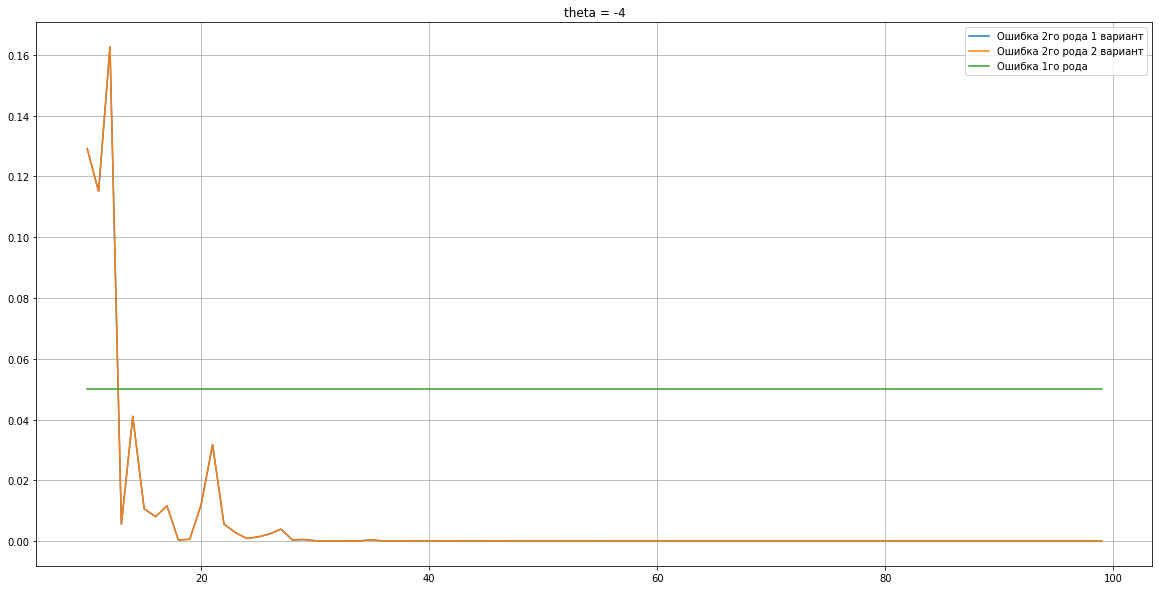

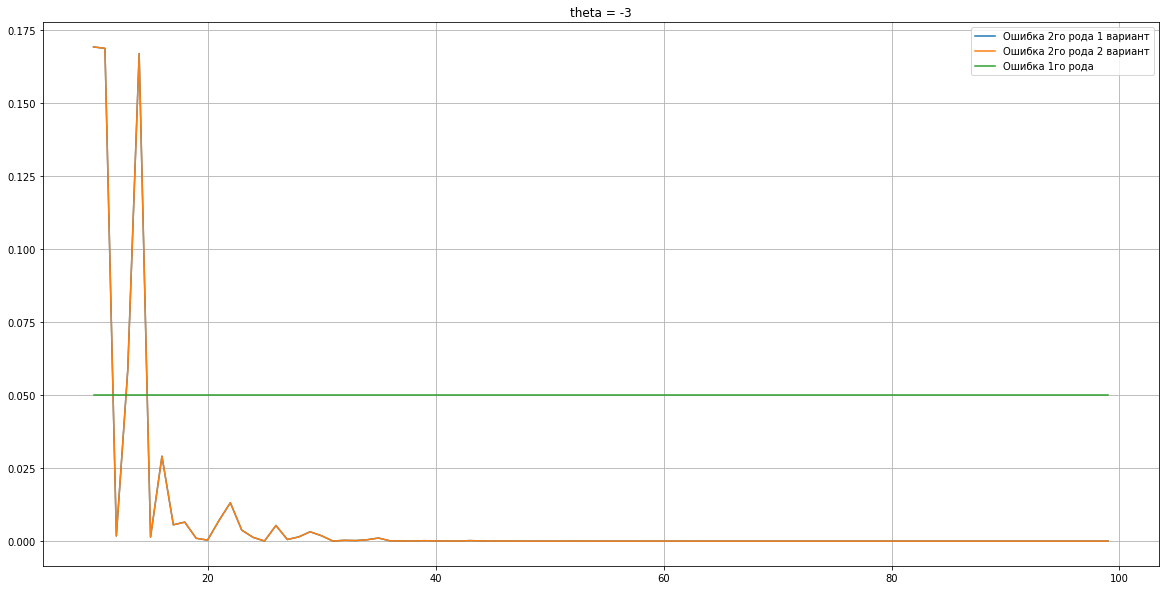

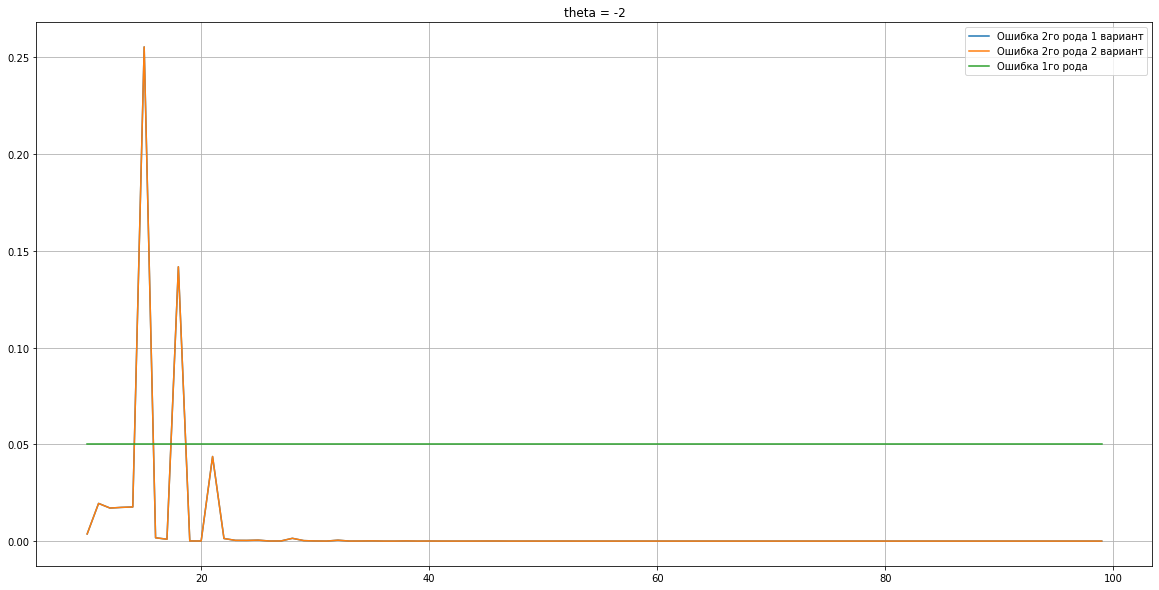

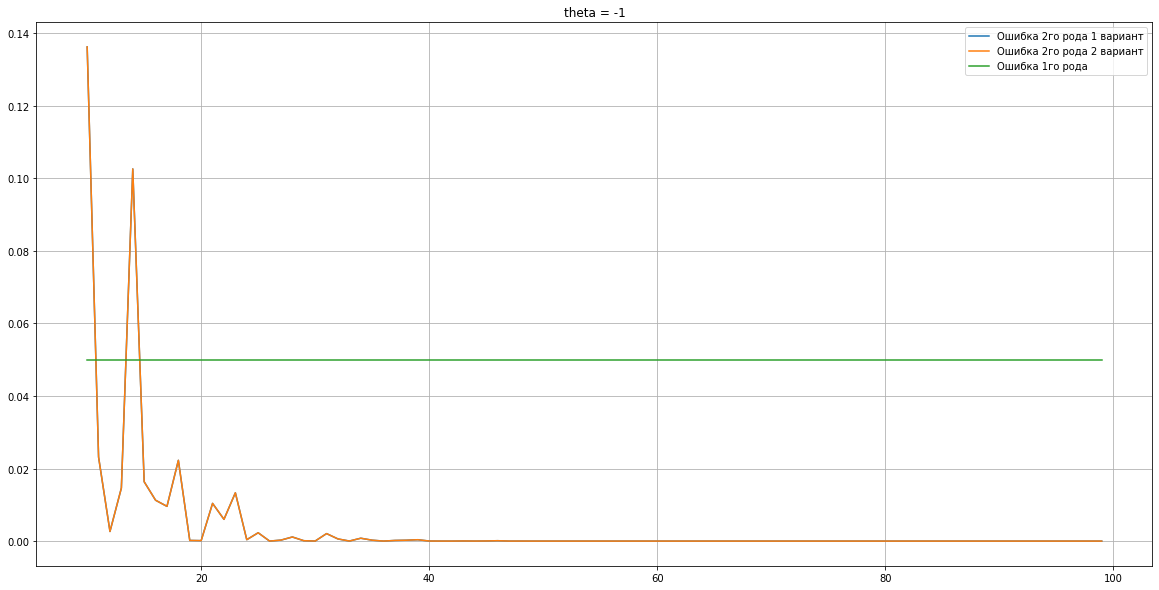

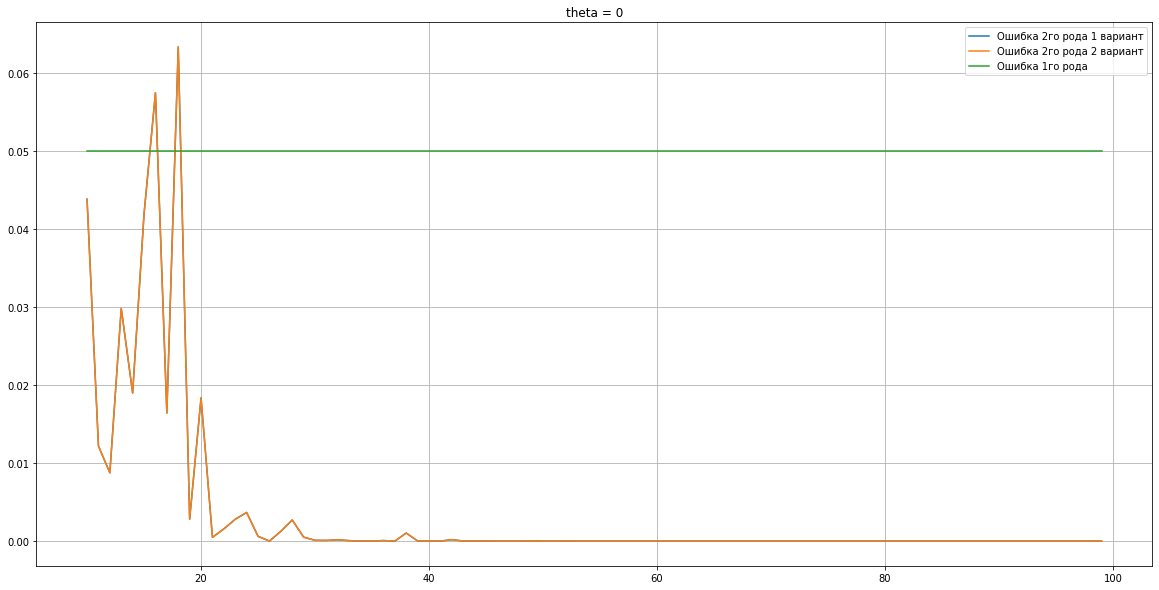

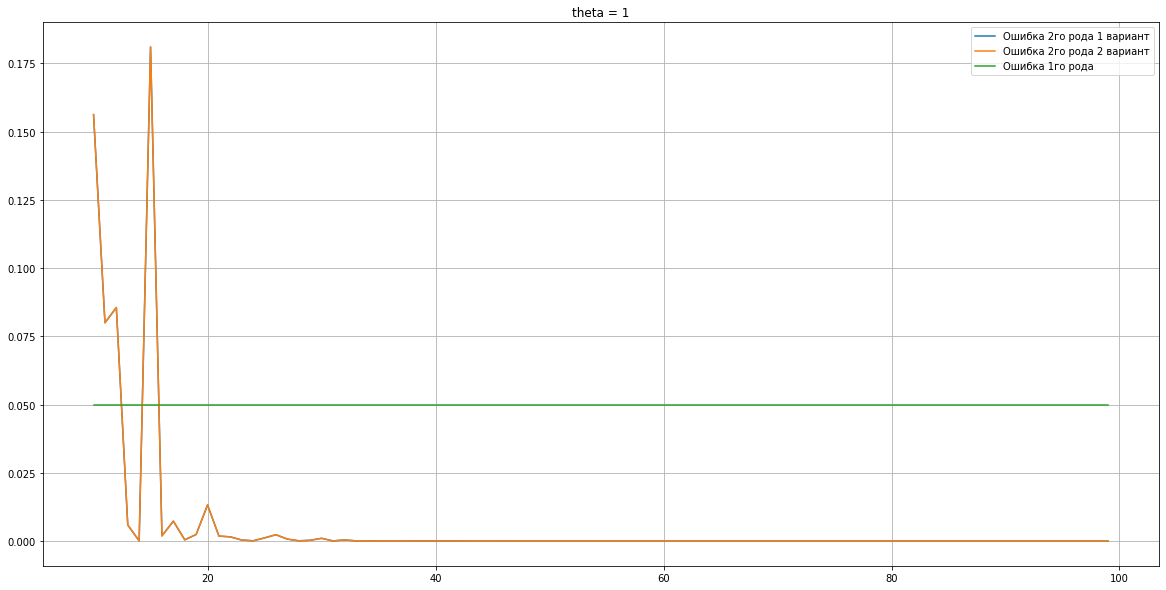

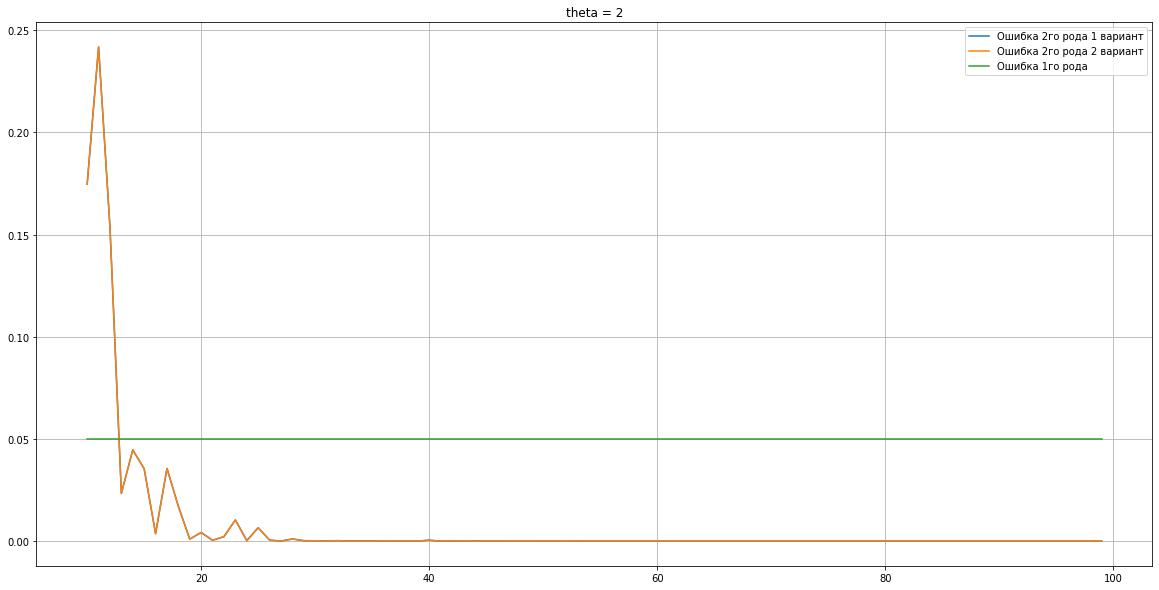

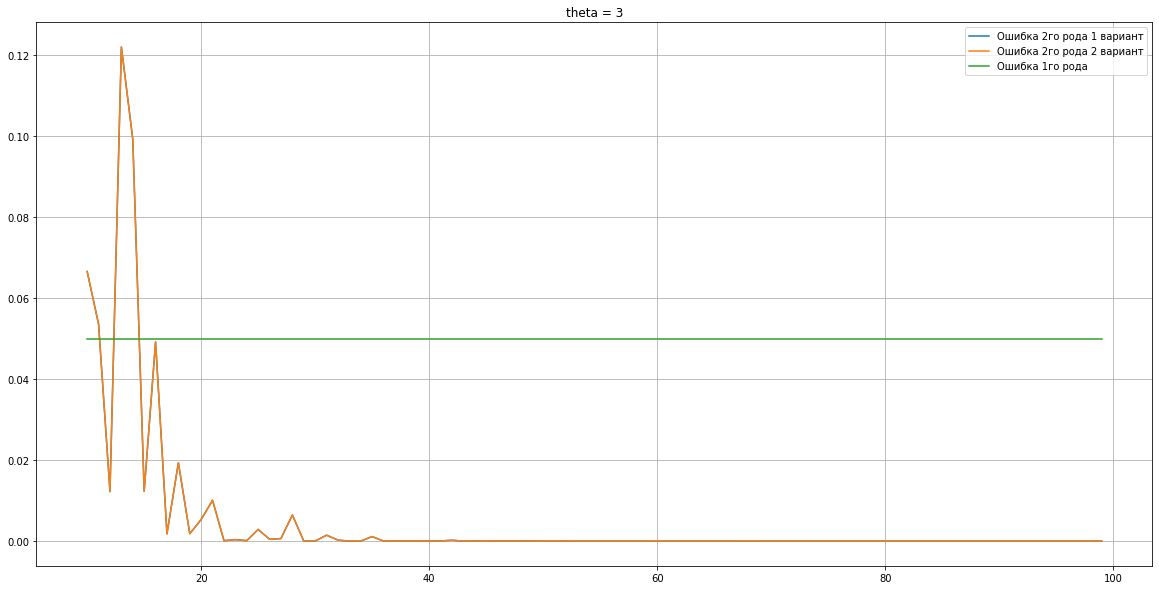

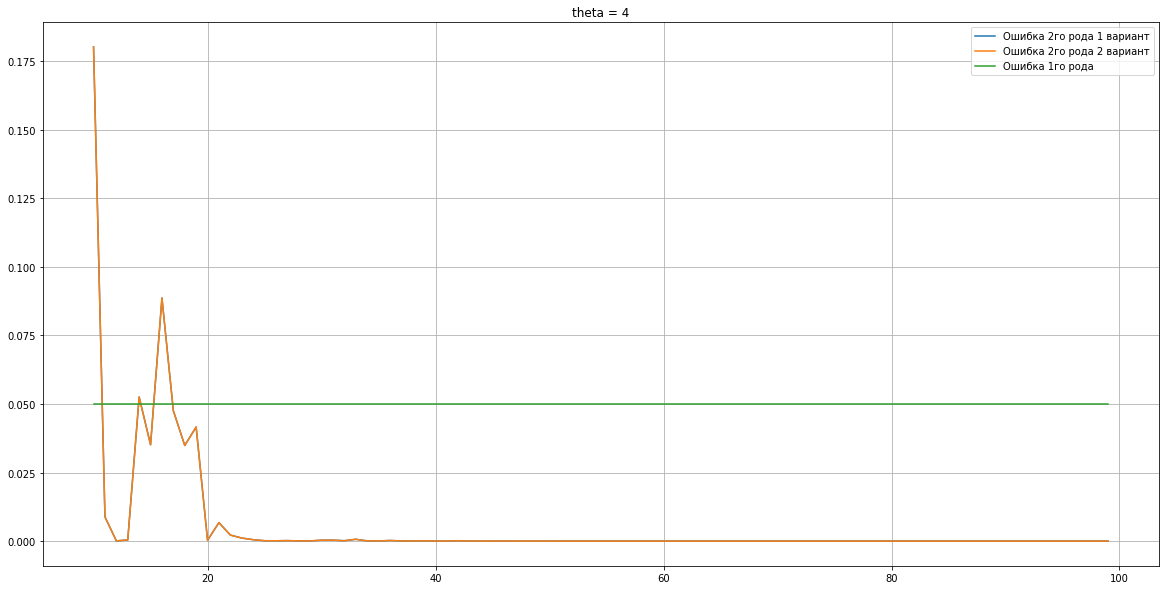

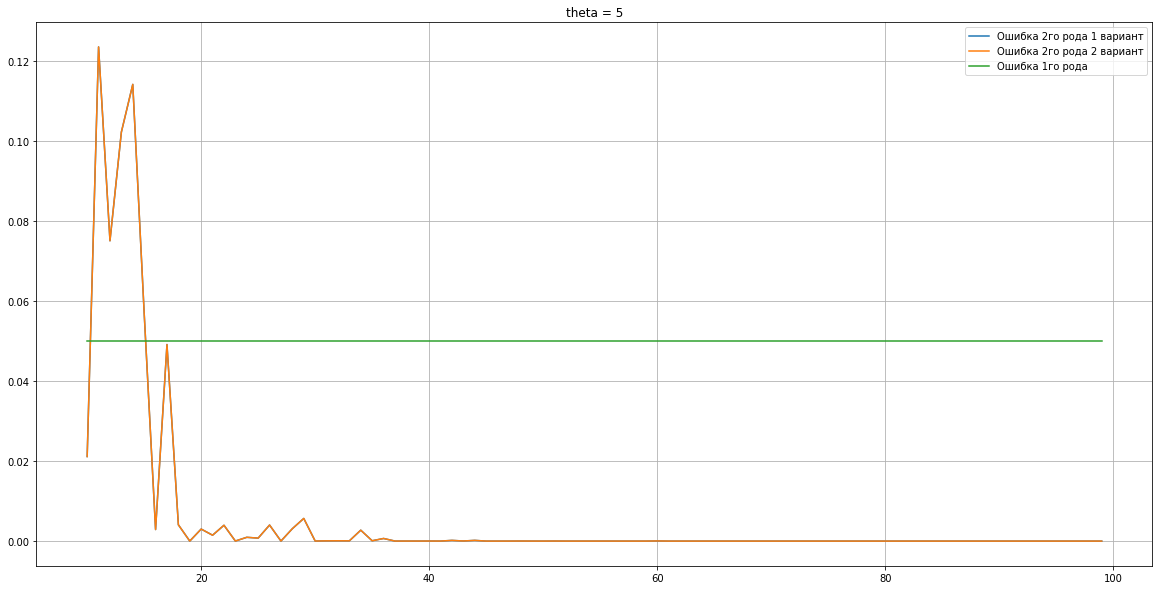

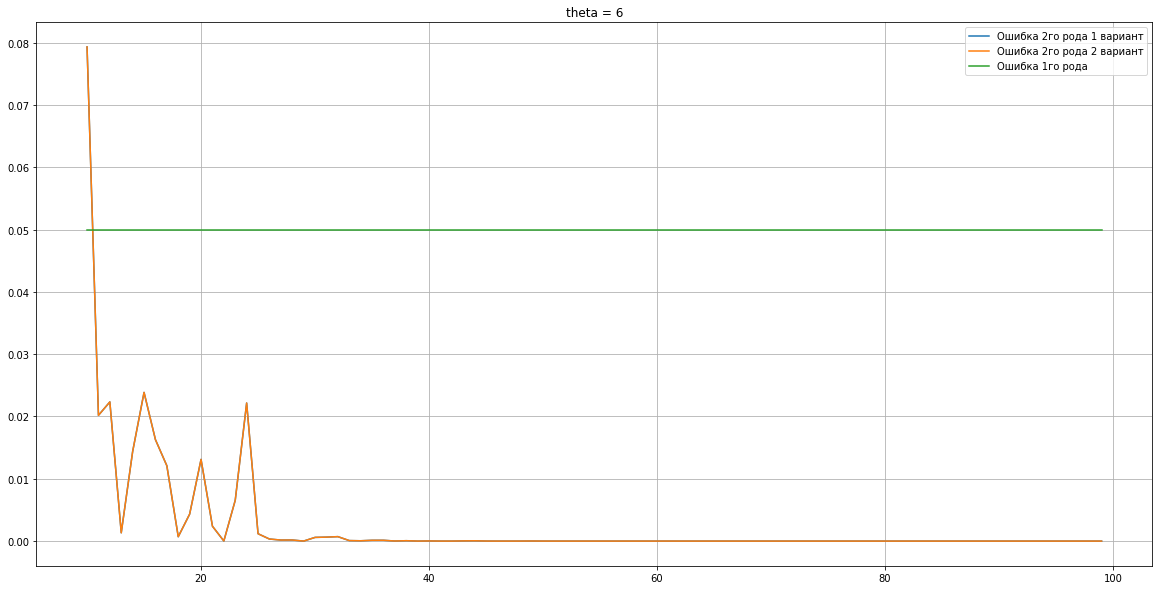

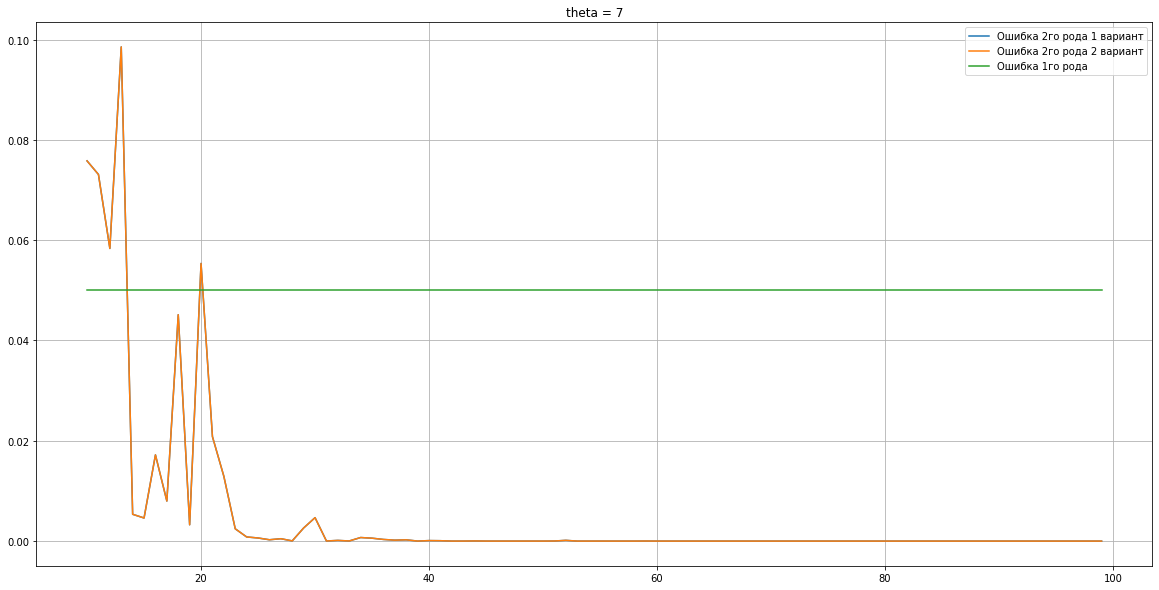

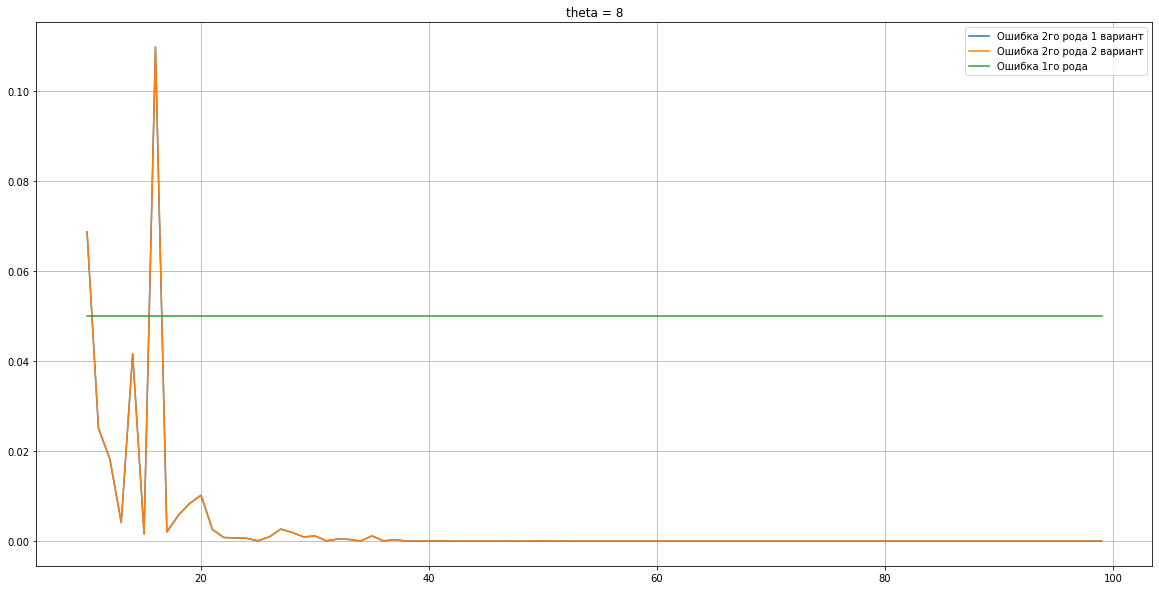

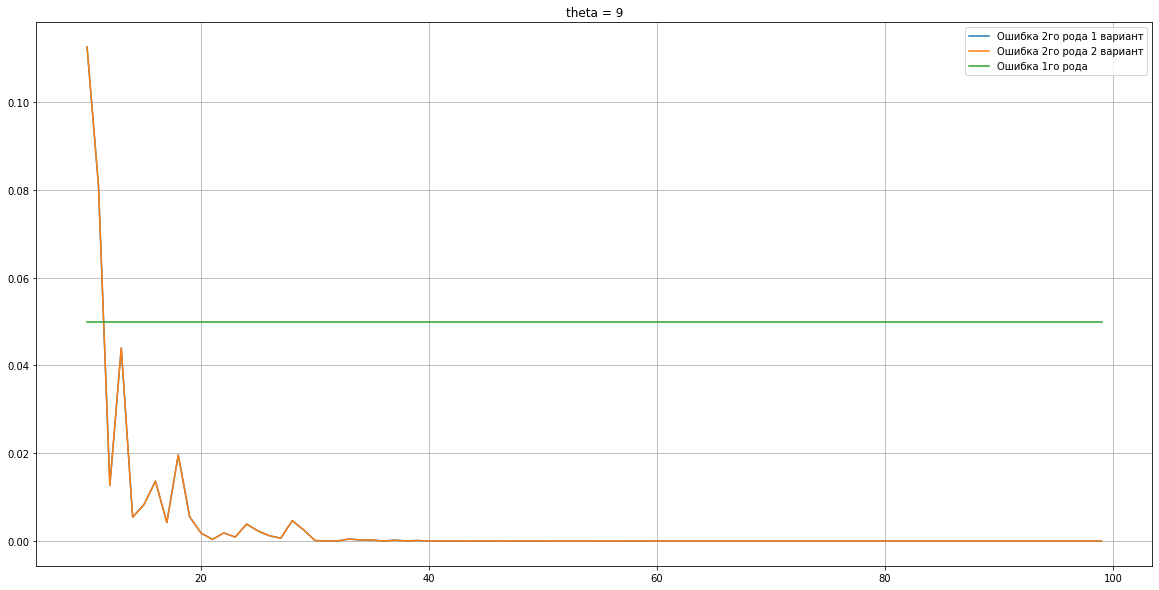

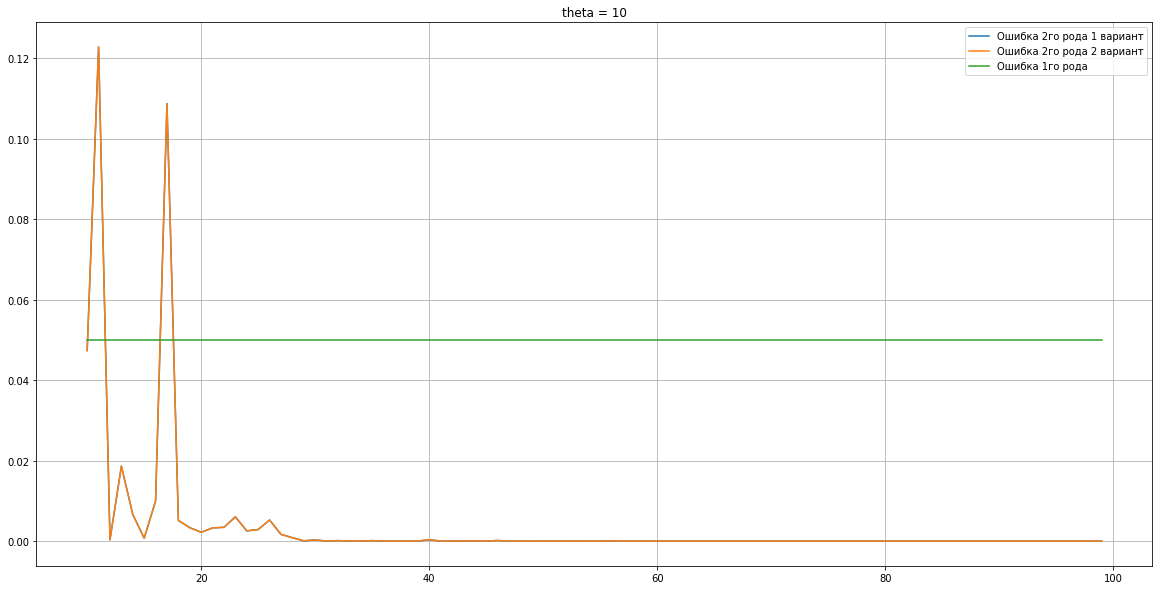

In [9]:
theta = np.array(list(range(-10,11)))
grid = np.array([i for i in range(10, 100)])
for theta_ in theta:
    error2nd1var = []
    error2nd2var = []
    for sample_size in grid:
        sample = stats.norm.rvs(loc=theta_, size=sample_size)
        z1 = stats.t.ppf(1-alpha, df=sample_size)
        error2nd1var.append(stats.t.cdf(z1 - np.sqrt(sample_size) / var(sample), 
                                  df=sample_size))
        z2 = stats.t.ppf(alpha, df=sample_size)
        error2nd2var.append(1 - stats.t.cdf(z2 + np.sqrt(sample_size) / var(sample), 
                                      df=sample_size))
    plt.figure(figsize=(20,10))
    plt.plot(
        grid,
        error2nd1var,
        label="Ошибка 2го рода 1 вариант")
    plt.plot(
        grid,
        error2nd2var,
        label="Ошибка 2го рода 2 вариант")
    plt.plot(
        grid,
        alpha*np.ones(len(grid)),
        label="Ошибка 1го рода")
    plt.title(f"theta = {theta_}")
    plt.legend()
    plt.grid()
    plt.show()

# Вывод №2

 

*   Hазмерf выборки ~21 и более достаточно, чтобы вероятность ошибки 1 рода стала больше вероятности ошибки 2 рода.
*   При  $n\geq 10000$  мощность *t-критерия* равна единице, значит, вероятность совершить ошибку 2 рода практически нулевая. Это обьясняется тем, что при увеличении обьема выборки улучшается качество проверки гипотезы.


# Задача №3

В файле $\textbf{9-3.npy}$ дана выборка $X = (X_1, \ldots, X_{200}).$ Рассмотрим основную гипотезу $H_0: X \sim \mathcal{N}(0,\sigma^2)$ против альтернативы
 $H_1: X \sim Laplace(\theta)$.
 На основе байесовского критерия
 построить критерии различения
  $H_0$ и $H_1$ уровня значимости $0.05$ с помощью
  моделирования (построив эмпирическое распределение статистики байесовского критерия с помощью $N=10000$ выборок)
  и определить, к какому распределению
  принадлежит выданная выборка. Напомним, статистика байесовского критерия следующая:
  $$K = \frac{\int f_0(X, \sigma) q(\sigma) d\sigma}{\int f_1(X, \theta) \widetilde{q}(\theta)
d\theta},$$ где $f_0$ и $f_1$ -- функции правдоподобия,
соответствующие гипотезам $H_0$ и $H_1$ соответственно, а
$q(\sigma)$ и $\widetilde{q}(\theta)$ -- априорные плотности
$\sigma$ и $\theta.$ Выбрать априорным распределением $\sigma$ и
$\theta$ стандартное экспоненциальное,
 также предположить, что $\sigma$ и $\theta$ независимы.

Загружать данные необходимо с помощью функции $\textbf{numpy.load()}$.

# Решение

Сперва считаем данные.  

Нужно проверить:
$$H_0: X \sim \mathcal{N}(0,\sigma^2)\space\verb|vs|\space H_1: X \sim Laplace(\theta)$$  



In [0]:
sample = collect_data_via_gd(
    link="https://drive.google.com/open?id=1KXd8FTmt0nyuM3jWgCHK31_MlmTiSrO1",
    filenm="9-3.npy"
)

Посчитаем выборочную дисперсию:

In [0]:
var = stats.moment(sample, moment=2)

Зная, что для распределения Лапласа (для нормального совсем известно) есть следующая зависимость между дисперсией и параметро распределения:
$$\sigma^{2}_{\theta}=\frac{2}{\theta^2},$$
построим гистограмму, 

In [0]:
arg = np.linspace(min(sample), max(sample), len(sample)*20)
plt.figure(figsize=(10,5), dpi=160)
plt.plot(
    arg, 
    stats.norm(0, np.sqrt(var)).pdf(x),
    label=r'$\mathcal{N}(0,\sigma^2)$')
plt.plot(
    arg,
    stats.laplace(scale=np.sqrt(2/var)).pdf(x),
     label=r'$Laplace(\theta)$')
plt.hist(
    sample,
     bins=len(sample)//5,
     density=True,
     color="y")
plt.legend()
plt.show()

# Вывод №3